In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import sklearn
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from force_layout import force_layout

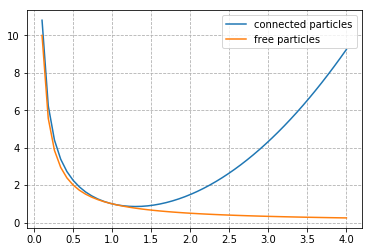

In [4]:
# Potential
x = np.linspace(0.1, 4)
fig, ax = plt.subplots()
ax.plot(x, 1/x + (x-1)**2, label='connected particles')
ax.plot(x, 1/x, label='free particles')
ax.grid(ls='--')
ax.legend()

In [7]:
adj_matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 1, 1],
    [0, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1]
])

x, xs, losses = force_layout(adj_matrix)

In [8]:
def get_points_to_plot(x):
    return x.T.tolist()

def get_connections_to_plot(x, adj_matrix):
    N = x.shape[0]

    # numpy magic
    pairs_mask = np.triu(adj_matrix).reshape(-1).astype(bool)
    pairs = np.array(np.meshgrid(np.arange(N), np.arange(N))).T.reshape(-1, 2)
    return x[pairs[pairs_mask]].reshape(-1, 2).T.tolist()

In [9]:
def show_points(x, adj_matrix, ax):
    ax.grid(ls='--')
    points = get_points_to_plot(x)
    ax.scatter(*points, color='red', s=100, zorder=100, edgecolor='black')
    
    for i, point in enumerate(zip(*points)):
        ax.annotate(str(i+1), (point[0] + 0.1, point[1] + 0.1), zorder=200, fontsize=15)

    ax.plot(*get_connections_to_plot(x, adj_matrix), zorder=10)

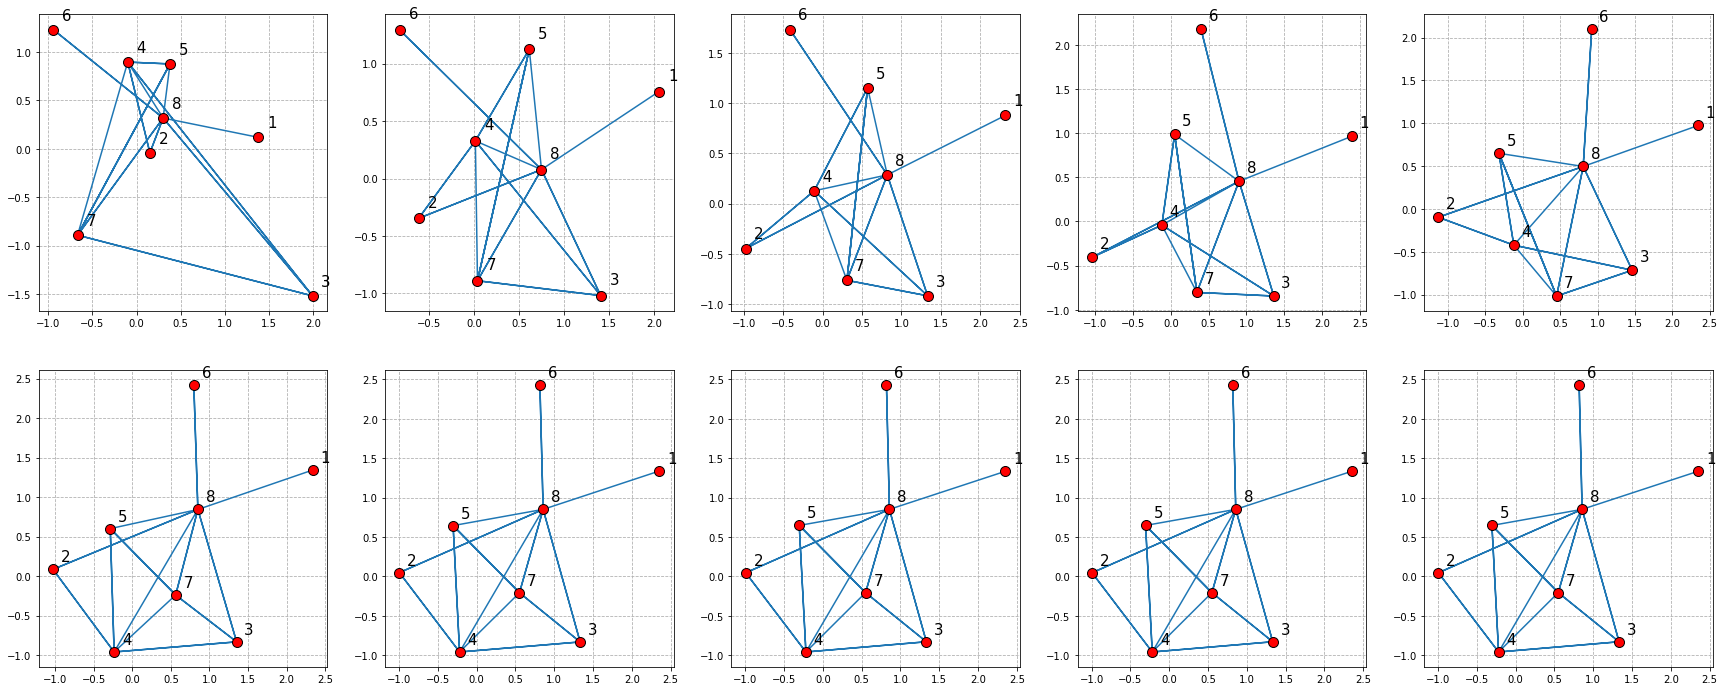

In [30]:
fig, ax = plt.subplots(figsize=(30, 12), ncols=5, nrows=2)
ax = ax.flatten()
for i in range(10):
    show_points(xs[len(xs) // 10 * i], adj_matrix, ax=ax[i])

In [ ]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(6, 6))

all_x = np.array(xs)[:, :, 0]
all_y = np.array(xs)[:, :, 1]
ax.set_xlim(all_x.min() - 0.2, all_x.max() + 0.2)
ax.set_ylim(all_y.min() - 0.2, all_y.max() + 0.2)

ax.grid(ls='--')

points = ax.scatter([], [], color='red', s=100, zorder=100, edgecolor='black')
line, = ax.plot([], [], zorder=10)

def init():
    return line, points

def animate(i):
    offsets = get_points_to_plot(xs[i])
    points.set_offsets(list(zip(*offsets)))
    line.set_data(*get_connections_to_plot(xs[i], adj_matrix))
    return line, points
 
anim = FuncAnimation(fig, animate, init_func=init, frames=len(xs), interval=40)

In [15]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [27]:
anim.save('force_layout.gif', writer='imagemagick', fps=25)